In [6]:
import pandas as pd
from skimage import io, transform
import os
import torch
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import warnings
warnings.filterwarnings("ignore")


Filename    00010.ppm
Width              53
Height             49
Roi.X1              6
Roi.Y1              6
Roi.X2             48
Roi.Y2             44
ClassId            28
Name: 10, dtype: object
00010.ppm


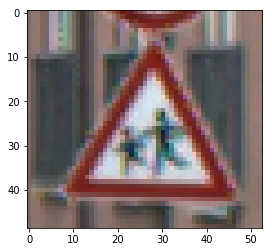

In [2]:
labels_frame = pd.read_csv('GTSRB/Online-Test/GT-online_test.csv', sep=";")
img_name = labels_frame.iloc[10]
print(img_name)
print(img_name['Filename'])
# print(labels_frame.iloc[10,:])
image = io.imread(os.path.join('GTSRB/Online-Test/Images/',img_name['Filename']))
plt.imshow(image)
plt.show()


In [3]:
class TrafficSignDataset(Dataset):
    """Traffic Sign Dataset"""
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images
            transform (callable, optional): Optional transform to be applied on a sample
        """
        self.labels_frame = pd.read_csv(csv_file, sep=";")
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels_frame)
    
    def __getitem__(self, idx):
        img = self.labels_frame.iloc[idx]
#         print(img)
        image = Image.open(os.path.join(self.root_dir, img['Filename']))
        label = img['ClassId']
        
        if self.transform:
            image = self.transform(image)
        
        sample = {'image': image, 'class': label}
        
        return sample
    

In [4]:
test_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


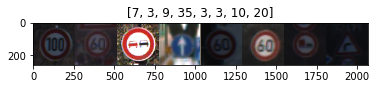

In [11]:
root_dir = 'GTSRB/Online-Test/'
traffic_dataset = TrafficSignDataset(csv_file=os.path.join(root_dir, 'GT-online_test.csv'), 
                                     root_dir=os.path.join(root_dir, 'Images/'),
                                     transform=test_transform)
# fig = plt.figure()

# for i in range(len(traffic_dataset)):
#     sample = traffic_dataset[i]
    
#     print(i, sample['image'].shape, sample['class'])
    
#     ax = plt.subplot(1, 2, i+1)
#     plt.tight_layout()
#     plt.imshow(sample['image'])
#     if i==1:
#         plt.show()
#         break

train_loader = torch.utils.data.DataLoader(traffic_dataset, batch_size=8)                           
data_iter = iter(train_loader)
sample = data_iter.next()
images, labels = sample['image'], sample['class']
# Make a grid from batch
out = torchvision.utils.make_grid(images)

imshow(out, title=[x for x in labels])
